In [1]:
#pip install psycopg2
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# telecom

In [2]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "telecom"

In [3]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    telecom = pd.read_sql_query(sql, conn)

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   churn                         9760 non-null   object             
 1   gender                        9760 non-null   object             
 2   network                       9760 non-null   object             
 3   available_4g                  9760 non-null   object             
 4   service_type                  9760 non-null   object             
 5   monthly_usage_rs              9760 non-null   int64              
 6   relation_durattion            9760 non-null   object             
 7   recommend_to_others           9760 non-null   object             
 8   pleaseed_with_prices          9760 non-null   object             
 9   source_of_attraction          9760 non-null   object             
 10  reascon_of_contact_cc         9760 n

In [5]:
telecom.head()

,churn,gender,network,available_4g,service_type,monthly_usage_rs,relation_durattion,recommend_to_others,pleaseed_with_prices,source_of_attraction,...,satisfy_with_call_rate,rate_of_cust_care_calling,happy_with_intrnet_quality,satisfy_with_voice_quality,satisfy_with_billing_process,satisfy_with_signal_strength,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_telecom_hashid
0,No,Female,Jazz / Warid,Yes,Pre Paid,800,More than one year,Yes,Yes,Advertisement,...,Yes,rarely,Yes,Yes,Yes,Yes,26b2c3fd-2048-44d3-ba07-02a0972c3c02,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,2e58d2285993f670d2f4276c1e3a08c2
1,No,Female,Jazz / Warid,Yes,Pre Paid,500,More than one year,No,No,Others,...,No,rarely,No,Yes,No,Yes,1386d019-090b-47b1-9791-8d5b4a3fc178,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,6918f4a6ee2aa7927571061343edb4d2
2,No,Male,Jazz / Warid,Yes,Pre Paid,500,More than one year,Yes,No,Advertisement,...,No,rarely,Yes,No,Yes,No,6af9e452-aefe-427c-bda5-78a34d96d17e,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,29eee146afff8ca4ba55608ee78f7cc3
3,No,Female,Jazz / Warid,Yes,Pre Paid,300,More than one year,Yes,Yes,Advertisement,...,Yes,rarely,Yes,Yes,No,Yes,12f97fff-83b4-4532-8819-f51519c8a5b0,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,ade74ffc914ca0fa0510d169641e08a3
4,No,Male,Jazz / Warid,Yes,Pre Paid,800,More than one year,Yes,No,Face book,...,Yes,rarely,Yes,Yes,No,Yes,ebd2c9aa-0add-43e5-93e8-1dcd1bf7b6db,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,d10e9cf7fe5bead2ade477e4e5a4218a


In [6]:
telecom['gender'] = telecom['gender'].map({'Female':0, 'Male':1}).astype(int)

In [7]:
telecom['network'].unique()

array(['Jazz / Warid', 'Zong', 'Ufone', 'Telenor'], dtype=object)

In [8]:
telecom['network'] = telecom['network'].map({'Jazz / Warid':0, 'Zong':1, 'Ufone':2, 'Telenor':3}).astype(int)

In [9]:
telecom = telecom.replace('No', 0)
telecom = telecom.replace('Yes', 1)

In [10]:
telecom.head()

,churn,gender,network,available_4g,service_type,monthly_usage_rs,relation_durattion,recommend_to_others,pleaseed_with_prices,source_of_attraction,...,satisfy_with_call_rate,rate_of_cust_care_calling,happy_with_intrnet_quality,satisfy_with_voice_quality,satisfy_with_billing_process,satisfy_with_signal_strength,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_telecom_hashid
0,0,0,0,1,Pre Paid,800,More than one year,1,1,Advertisement,...,1,rarely,1,1,1,1,26b2c3fd-2048-44d3-ba07-02a0972c3c02,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,2e58d2285993f670d2f4276c1e3a08c2
1,0,0,0,1,Pre Paid,500,More than one year,0,0,Others,...,0,rarely,0,1,0,1,1386d019-090b-47b1-9791-8d5b4a3fc178,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,6918f4a6ee2aa7927571061343edb4d2
2,0,1,0,1,Pre Paid,500,More than one year,1,0,Advertisement,...,0,rarely,1,0,1,0,6af9e452-aefe-427c-bda5-78a34d96d17e,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,29eee146afff8ca4ba55608ee78f7cc3
3,0,0,0,1,Pre Paid,300,More than one year,1,1,Advertisement,...,1,rarely,1,1,0,1,12f97fff-83b4-4532-8819-f51519c8a5b0,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,ade74ffc914ca0fa0510d169641e08a3
4,0,1,0,1,Pre Paid,800,More than one year,1,0,Face book,...,1,rarely,1,1,0,1,ebd2c9aa-0add-43e5-93e8-1dcd1bf7b6db,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,d10e9cf7fe5bead2ade477e4e5a4218a


In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   churn                         9760 non-null   int64              
 1   gender                        9760 non-null   int32              
 2   network                       9760 non-null   int32              
 3   available_4g                  9760 non-null   int64              
 4   service_type                  9760 non-null   object             
 5   monthly_usage_rs              9760 non-null   int64              
 6   relation_durattion            9760 non-null   object             
 7   recommend_to_others           9760 non-null   int64              
 8   pleaseed_with_prices          9760 non-null   int64              
 9   source_of_attraction          9760 non-null   object             
 10  reascon_of_contact_cc         9760 n

In [12]:
telecom['service_type'].unique()

array(['Pre Paid', 'Post Paid'], dtype=object)

In [13]:
telecom['service_type'] = telecom['service_type'].map({'Pre Paid':0, 'Post Paid':1}).astype(int)

In [14]:
telecom['relation_durattion'].unique()

array(['More than one year', '7 12 Months', '2 6 Months',
       'Less than one Month'], dtype=object)

In [15]:
telecom['relation_durattion'] = telecom['relation_durattion'].map(
    {'More than one year':0, '7 12 Months':1, '2 6 Months':2, 'Less than one Month':3}).astype(int)

In [16]:
telecom['source_of_attraction'].unique()

array(['Advertisement', 'Others', 'Face book', 'Newspaper'], dtype=object)

In [17]:
telecom['rate_of_cust_care_calling'].unique()

array(['rarely', 'Once in a year', 'Once in a Month', 'Once in a Week'],
      dtype=object)

In [18]:
telecom['source_of_attraction'] = telecom['source_of_attraction'].map(
    {'Advertisement':0, 'Others':1, 'Face book':2, 'Newspaper':3}).astype(int)

In [19]:
telecom['rate_of_cust_care_calling'] = telecom['rate_of_cust_care_calling'].map(
    {'rarely':0, 'Once in a year':1, 'Once in a Month':2, 'Once in a Week':3}).astype(int)

In [20]:
# drop irrelevant data
telecom.drop(list(telecom.filter(regex = '_airbyte_')), axis = 1, inplace = True)
telecom.head()

,churn,gender,network,available_4g,service_type,monthly_usage_rs,relation_durattion,recommend_to_others,pleaseed_with_prices,source_of_attraction,reascon_of_contact_cc,contact_with_cust_care,prferred_communication,satisfy_with_call_rate,rate_of_cust_care_calling,happy_with_intrnet_quality,satisfy_with_voice_quality,satisfy_with_billing_process,satisfy_with_signal_strength
0,0,0,0,1,0,800,0,1,1,0,Complaints,0,messages,1,0,1,1,1,1
1,0,0,0,1,0,500,0,0,0,1,Complaints,1,Audio calling,0,0,0,1,0,1
2,0,1,0,1,0,500,0,1,0,0,Complaints,1,Audio calling,0,0,1,0,1,0
3,0,0,0,1,0,300,0,1,1,0,Information regarding new schemes,0,messages,1,0,1,1,0,1
4,0,1,0,1,0,800,0,1,0,2,Complaints,1,Audio calling,1,0,1,1,0,1


In [21]:
telecom['reascon_of_contact_cc'].unique()

array(['Complaints', 'Information regarding new schemes', 'Other Queries',
       'Value added services'], dtype=object)

In [22]:
telecom['prferred_communication'].unique()

array(['messages', 'Audio calling', 'Video Calling'], dtype=object)

In [23]:
telecom['reascon_of_contact_cc'] = telecom['reascon_of_contact_cc'].map(
    {'Complaints':0, 'Information regarding new schemes':1, 'Other Queries':2, 'Value added services':3}).astype(int)

In [24]:
telecom['prferred_communication'] = telecom['prferred_communication'].map(
    {'messages':0, 'Audio calling':1, 'Video Calling':2}).astype(int)

In [25]:
telecom.isnull().sum()

churn                           0
gender                          0
network                         0
available_4g                    0
service_type                    0
monthly_usage_rs                0
relation_durattion              0
recommend_to_others             0
pleaseed_with_prices            0
source_of_attraction            0
reascon_of_contact_cc           0
contact_with_cust_care          0
prferred_communication          0
satisfy_with_call_rate          0
rate_of_cust_care_calling       0
happy_with_intrnet_quality      0
satisfy_with_voice_quality      0
satisfy_with_billing_process    0
satisfy_with_signal_strength    0
dtype: int64

In [26]:
telecom = telecom.dropna()

In [27]:
telecom.isnull().sum()

churn                           0
gender                          0
network                         0
available_4g                    0
service_type                    0
monthly_usage_rs                0
relation_durattion              0
recommend_to_others             0
pleaseed_with_prices            0
source_of_attraction            0
reascon_of_contact_cc           0
contact_with_cust_care          0
prferred_communication          0
satisfy_with_call_rate          0
rate_of_cust_care_calling       0
happy_with_intrnet_quality      0
satisfy_with_voice_quality      0
satisfy_with_billing_process    0
satisfy_with_signal_strength    0
dtype: int64

In [28]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(telecom.drop("churn", axis = 1),telecom["churn"], test_size = 0.2,
                                      random_state = 404)

In [29]:
rf = RandomForestClassifier(random_state = 404)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [30]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=404),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [31]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [32]:
#change here
rfm = RandomForestClassifier(criterion = "gini", max_depth = 8,
                             max_features = "auto", n_estimators = 30,
                             random_state = 404)

rfm.fit(xtrain2,ytrain2)

RandomForestClassifier(max_depth=8, n_estimators=30, random_state=404)

In [33]:
y_train_preds2 = rfm.predict(xtrain2)
y_test_preds2 = rfm.predict(xtest2)

In [34]:
print(classification_report(ytest2, y_test_preds2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1582
           1       1.00      0.97      0.98       370

    accuracy                           0.99      1952
   macro avg       1.00      0.99      0.99      1952
weighted avg       0.99      0.99      0.99      1952



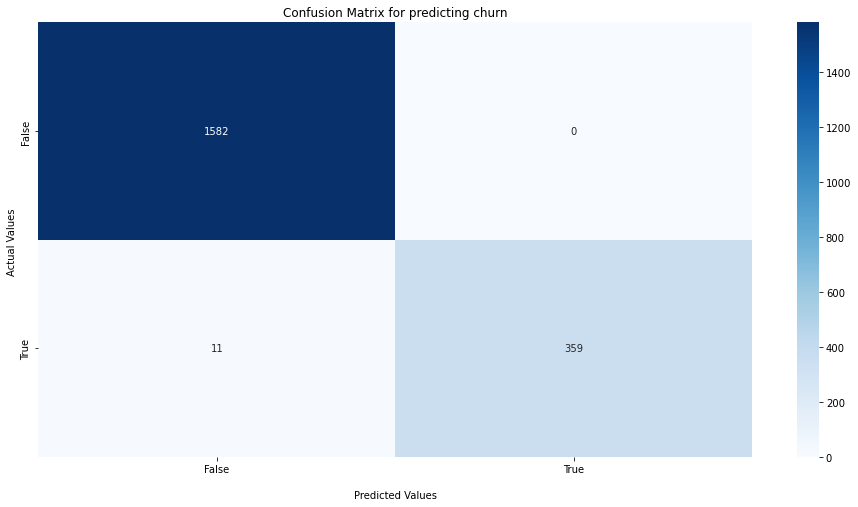

In [35]:
cf_matrix = confusion_matrix(ytest2, y_test_preds2)

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
# Obtain the feature importances
importances = rfm.feature_importances_

# Print the importances
feature_importance = pd.DataFrame(xtrain2.columns, columns=["feature"])
feature_importance["importance"] = importances
feature_importance.sort_values("importance", ascending=False)

,feature,importance
14,happy_with_intrnet_quality,0.154924
17,satisfy_with_signal_strength,0.131769
9,reascon_of_contact_cc,0.101125
15,satisfy_with_voice_quality,0.091696
4,monthly_usage_rs,0.061999
11,prferred_communication,0.057970
13,rate_of_cust_care_calling,0.055024
0,gender,0.046998
6,recommend_to_others,0.043833
12,satisfy_with_call_rate,0.041513
